In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

Classification of Comments: Climate Skeptics vs Climate Science

# Part 1

In [3]:
df = pd.read_csv("project8.csv")

In [4]:
df.head()

,Unnamed: 0,post_id,self_text,user_is_verified,controversiality,ups,downs,subreddit,score,user_awardee_karma,user_awarder_karma,user_total_karma,user_comment_karma,user_link_karma,post_score,post_upvote_ratio,post_thumbs_up,post_total_awards_ratio,post_created_time
0,1979,9grgvl,"Yes, modeling anything with less resolution i...",True True True True True True True,0.142857,2.857143,0,climate_science,2.857143,8.571429,0.000000,11034.571429,10438.285714,587.714286,33,0.97,33,0,2018-09-18 03:59:40
1,503,1anritd,"Thing is, there's no official paper that desc...",True True True True True True True,0.000000,9.000000,0,climateskeptics,9.000000,748.142857,9.571429,91926.000000,42031.571429,49136.714286,67,0.94,67,0,2024-02-10 21:56:09
2,1387,16xyvqf,I read that article a month ago. Not sure wh...,True,0.000000,2.000000,0,climateskeptics,2.000000,315.000000,0.000000,37103.000000,36305.000000,483.000000,7,0.73,7,0,2023-10-02 14:58:12
3,918,18ii60q,&gt; Dr. Paul Pettré provides a damning critq...,True,0.000000,3.000000,0,climateskeptics,3.000000,1683.000000,20.000000,164653.000000,63989.000000,98961.000000,12,0.93,12,0,2023-12-14 20:42:33
4,1375,16zuc0a,This was a really good interview. She really ...,False,0.000000,3.000000,0,climateskeptics,3.000000,1703.000000,114.000000,1817.000000,0.000000,0.000000,27,0.97,27,0,2023-10-04 18:12:08


In [5]:
grouped = df.groupby("subreddit")

In [12]:
quants = ["score", "controversiality", "ups", "downs", "user_awardee_karma", "user_awarder_karma", "user_total_karma", "user_comment_karma", "user_link_karma"]
statistics = grouped[quants].agg(['mean', 'var'])

In [13]:
statistics

score            controversiality                 ups  \
                     mean        var             mean       var      mean   
subreddit                                                                   
climate_science  3.687976   8.018977         0.006220  0.002064  3.687976   
climateskeptics  4.842995  11.684011         0.006197  0.001151  4.842995   

                           downs      user_awardee_karma                \
                       var  mean  var               mean           var   
subreddit                                                                
climate_science   8.018977   0.0  0.0         708.492273  5.570532e+06   
climateskeptics  11.684011   0.0  0.0         550.924661  2.467363e+05   

                user_awarder_karma                user_total_karma  \
                              mean            var             mean   
subreddit                                                            
climate_science         168.477611  422352.670854     82912.067046   
climateskeptics         128.172047  339814.415377     64198.231054   

                              user_comment_karma                \
                          var               mean           var   
subreddit                                                        
climate_science  1.219727e+11       40582.635908  2.719792e+10   
climateskeptics  5.079500e+09       37095.989273  1.379226e+09   

                user_link_karma                
                           mean           var  
subreddit                                      
climate_science    41452.461253  4.002539e+10  
climateskeptics    26423.145072  1.503040e+09

# Part 2

In [23]:
#subreddits_to_compare = ['climate_science', 'climateskeptics']
#filtered_df = df[df['subreddit'].isin(subreddits_to_compare)]

df_sci = df.loc[df['subreddit'] == 'climate_science']
df_skep = df.loc[df['subreddit'] == 'climateskeptics']



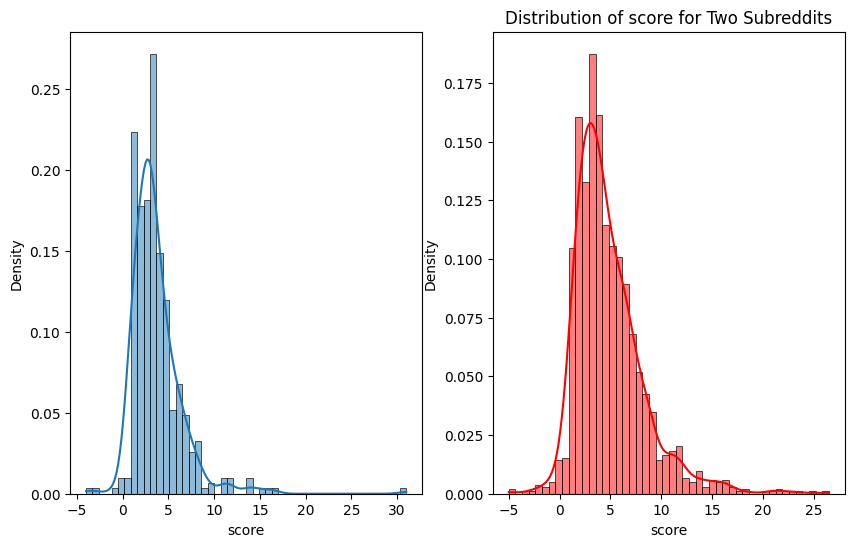

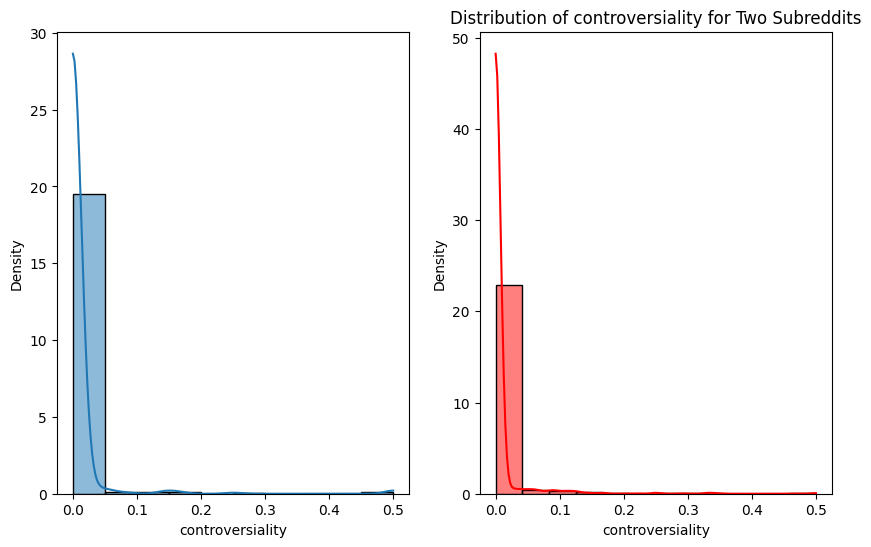

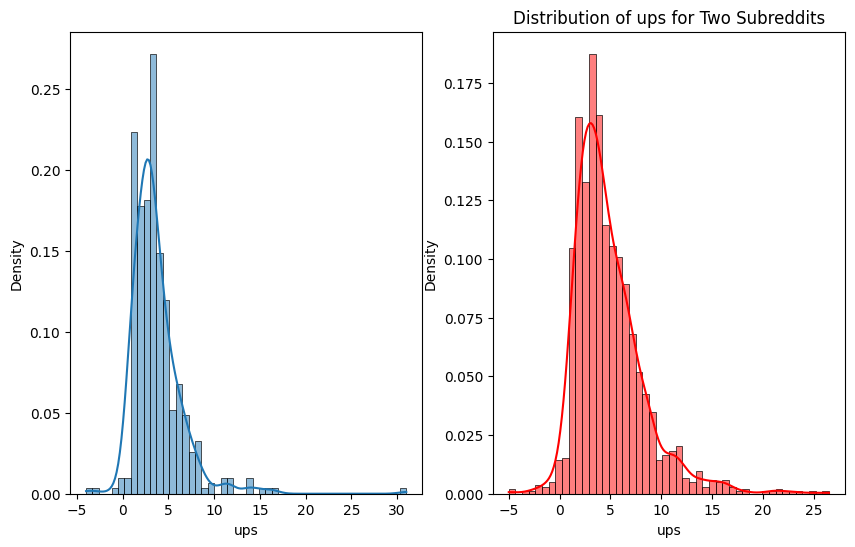

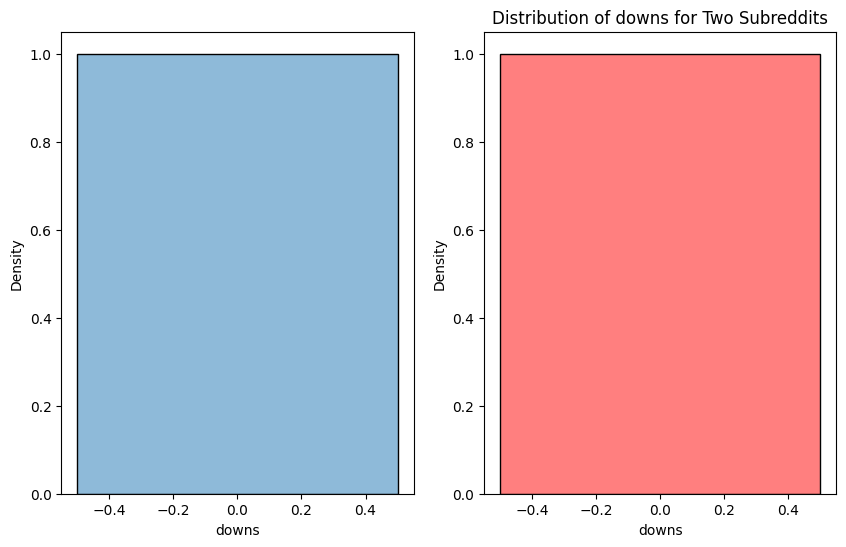

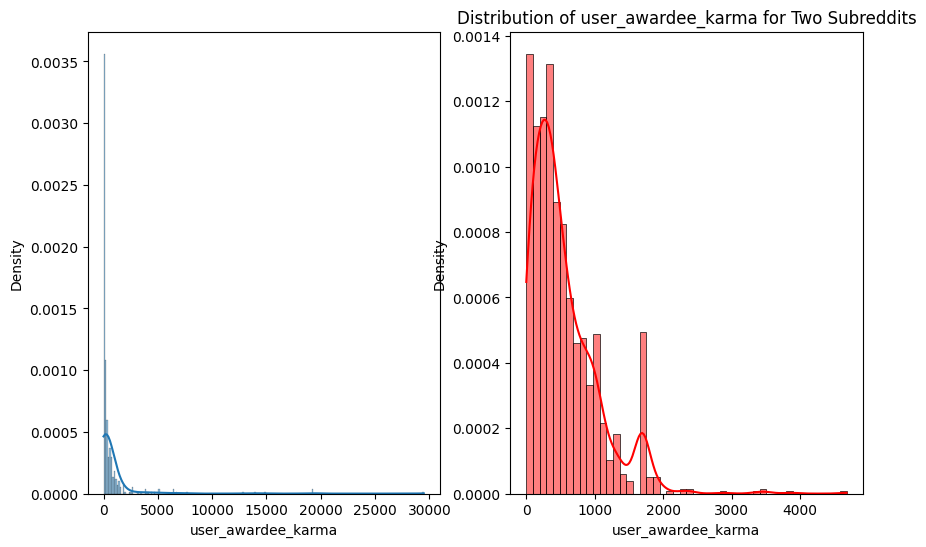

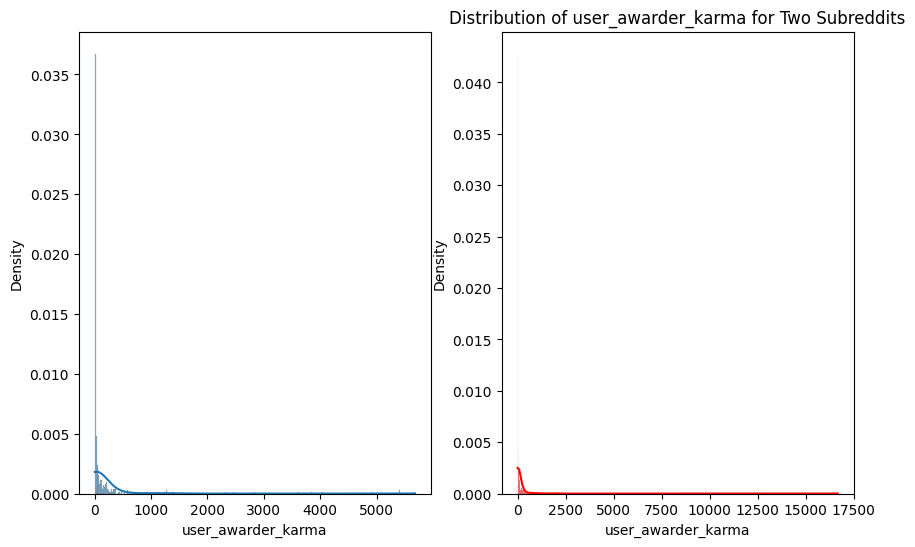

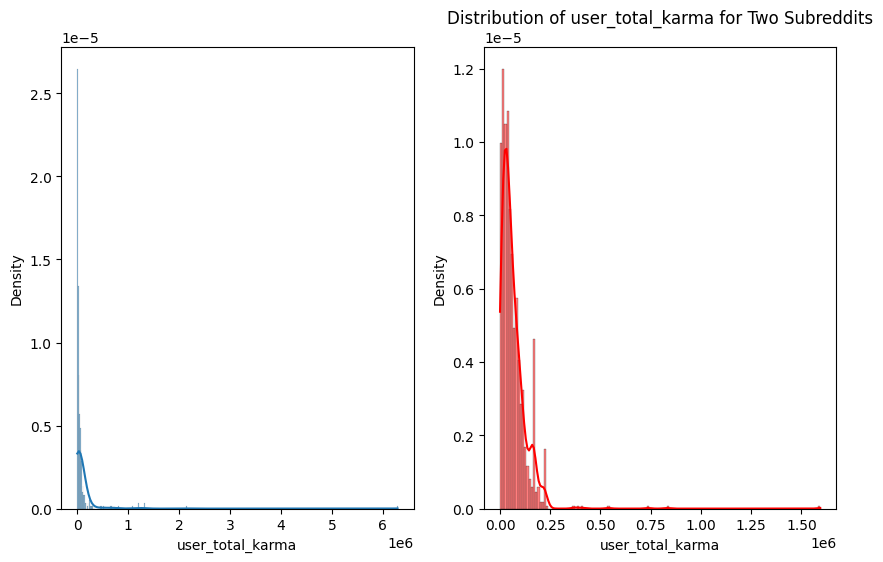

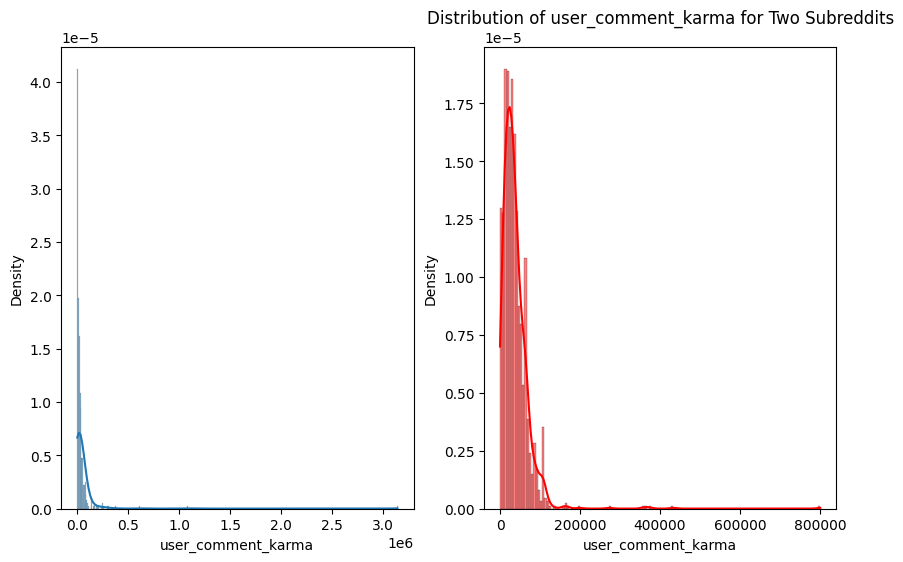

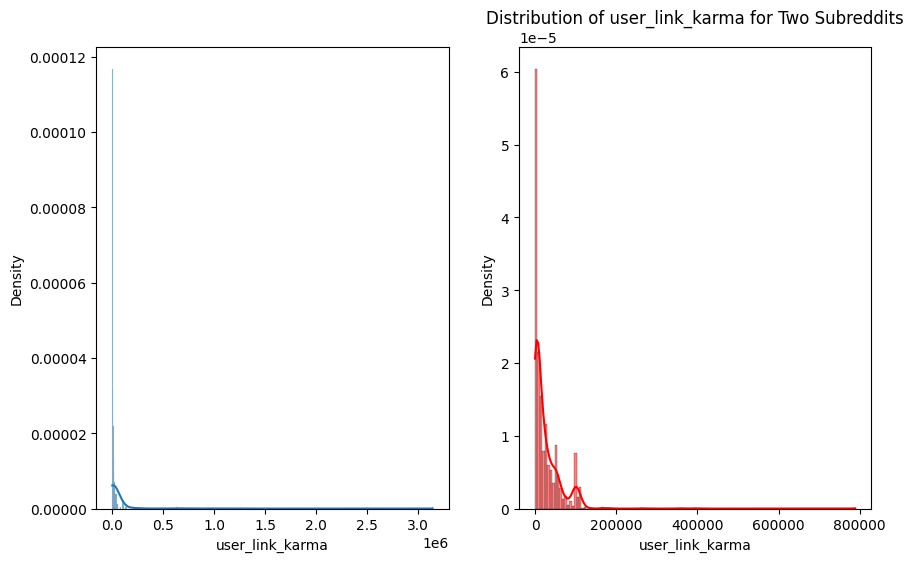

In [32]:
test = ['score']
# Plotting distributions for each feature
for feature in quants:
    #plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots(1,2, figsize=(10,6))
    sns.histplot(data=df_sci, x=feature, kde=True, stat="density", common_norm=False, ax=ax[0])
    sns.histplot(data=df_skep, x=feature, kde=True, stat="density", common_norm=False, ax=ax[1], color='red')
    plt.title(f'Distribution of {feature} for Two Subreddits')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


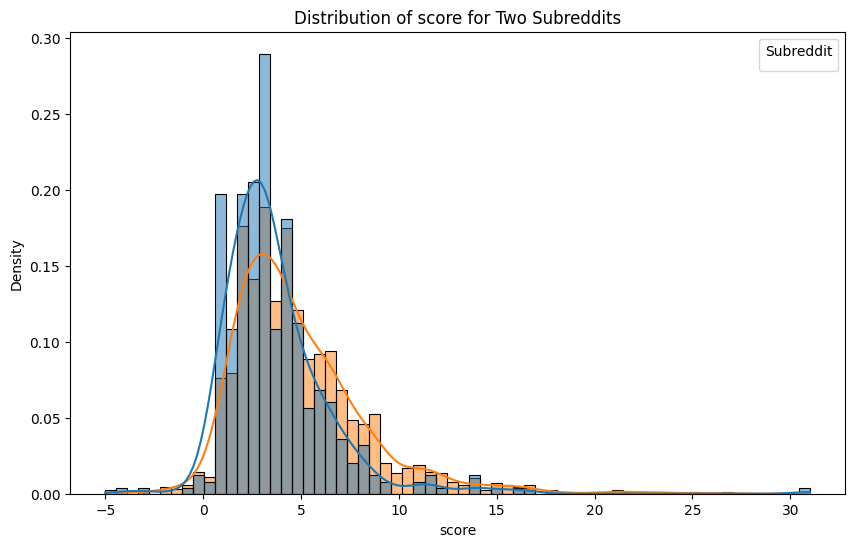

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


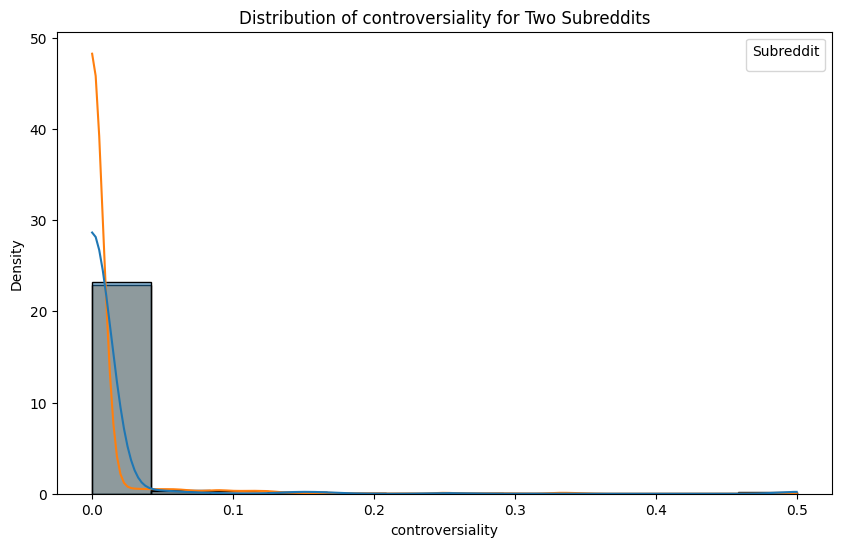

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


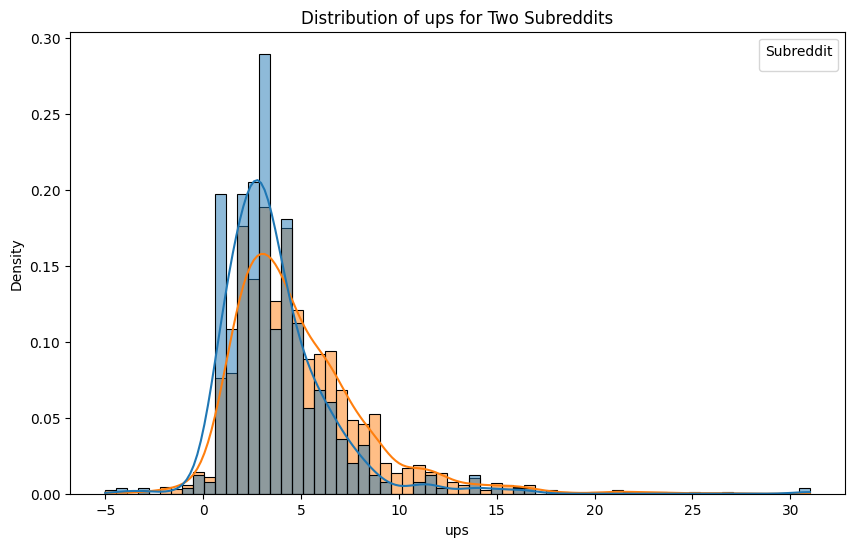

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


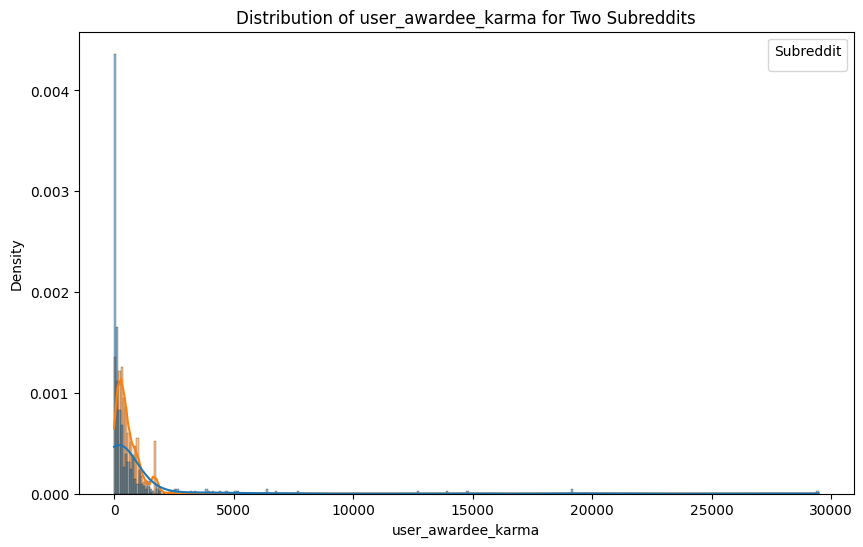

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


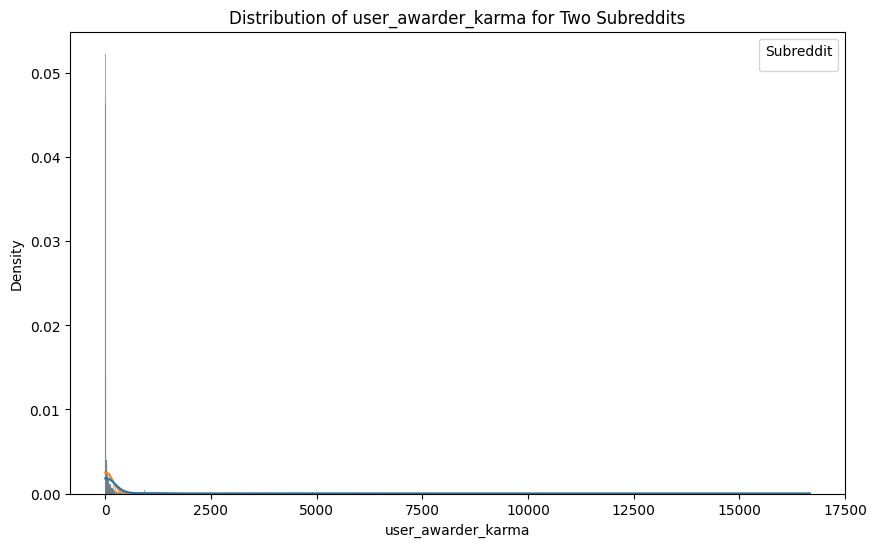

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


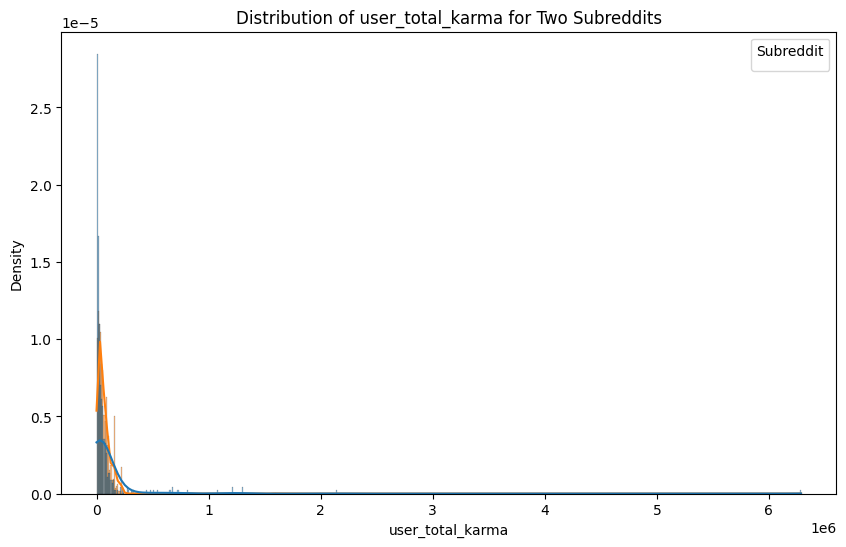

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


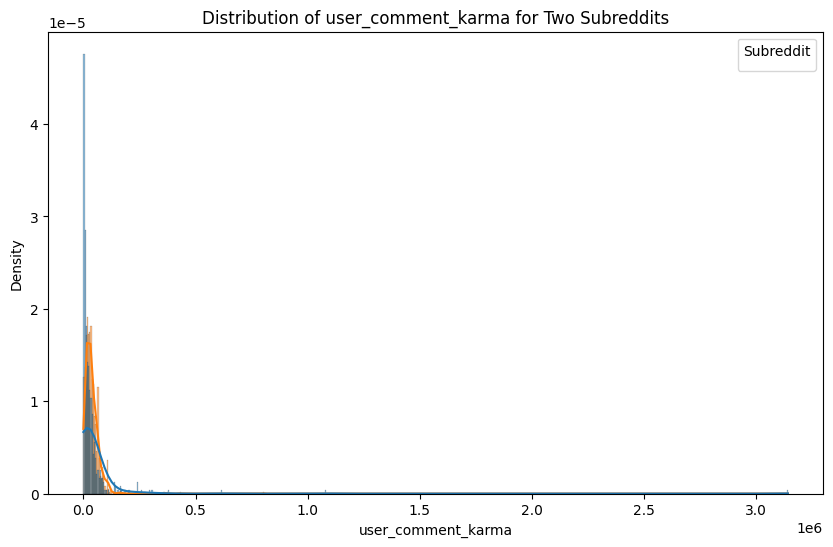

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


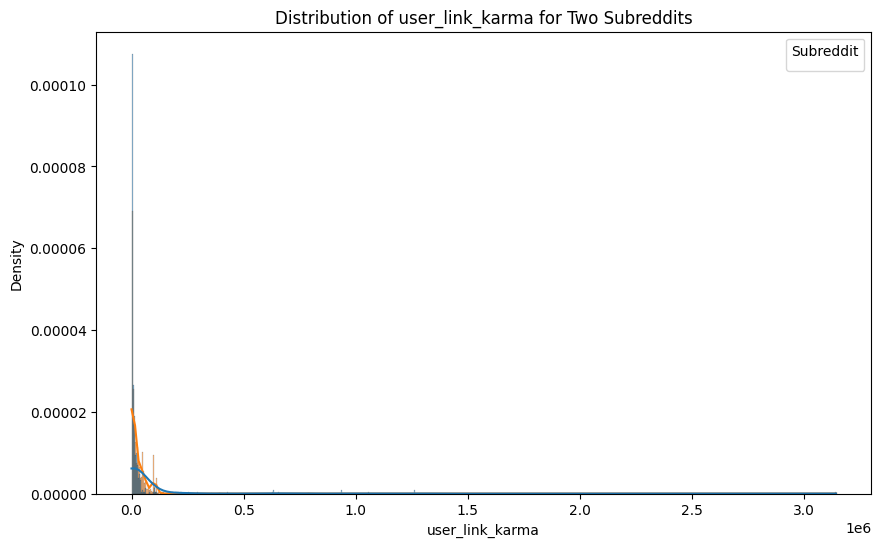

In [33]:
subreddits_to_compare = ['climate_science', 'climateskeptics']
filtered_df = df[df['subreddit'].isin(subreddits_to_compare)]

for feature in quants:
    if feature=='downs': continue
    plt.figure(figsize=(10, 6))
    sns.histplot(data=filtered_df, x=feature, hue='subreddit', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} for Two Subreddits')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Subreddit')
    plt.show()

# Part 3

In [43]:
normalish = ["score", "ups"]
alpha = .05
alphad2 = .025
# we use alphad2 for t-tests because these are two-tailed tests

for feature in quants:
    if feature == 'downs': continue
    
    sci_feat = df_sci[feature].dropna()
    skep_feat = df_skep[feature].dropna()
    # we must drop NaNs, else MW test fails to return
    '''print(feature)
    print(sci_feat)
    print(sci_feat.isna().sum())
    print()
    print(skep_feat)
    print(skep_feat.isna().sum())
    print()'''
    
    if feature in normalish:
        t_stat, p_val = stats.ttest_ind(sci_feat, skep_feat, equal_var=False)
        
        print(f"Two-sample t-test for {feature}:")
        print(f"t-statistic: {t_stat}")
        print(f"p-value: {p_val}")
        if p_val < alphad2: print("Reject Null Hypothesis")
        else: print("Fail to Reject Null Hypothesis")
        print("--------------------------------------------")
    
    else:
        u_stat, p_val = stats.mannwhitneyu(sci_feat, skep_feat, alternative='two-sided')
        
        print(f"Mann-Whitney U-Test for {feature}:")
        print(f"u-statistic: {u_stat}")
        print(f"p-value: {p_val}")
        if p_val < alpha: print("Reject Null Hypothesis")
        else: print("Fail to Reject Null Hypothesis")
        print("--------------------------------------------")
        
    

Two-sample t-test for score:
t-statistic: -7.231013600960234
p-value: 1.0853354570110612e-12
Reject Null Hypothesis
--------------------------------------------
Mann-Whitney U-Test for controversiality:
u-statistic: 341908.0
p-value: 0.051861227376005244
Fail to Reject Null Hypothesis
--------------------------------------------
Two-sample t-test for ups:
t-statistic: -7.231013600960234
p-value: 1.0853354570110612e-12
Reject Null Hypothesis
--------------------------------------------
Mann-Whitney U-Test for user_awardee_karma:
u-statistic: 232169.0
p-value: 4.008301436031417e-27
Reject Null Hypothesis
--------------------------------------------
Mann-Whitney U-Test for user_awarder_karma:
u-statistic: 318858.0
p-value: 0.004688839495166912
Reject Null Hypothesis
--------------------------------------------
Mann-Whitney U-Test for user_total_karma:
u-statistic: 244960.5
p-value: 7.593894215110759e-22
Reject Null Hypothesis
--------------------------------------------
Mann-Whitney U-Tes

mann-whitney test has Null Hypothesis: distributions of both populations are identical.

reject all null hypotheses except for controversiality

In [50]:
numSame = 0

for i in range(2027):
    if df["score"][i] == df["ups"][i]: numSame +=1

print(numSame)
print(len(df))

2027
2027


For all observations, the values of score and ups are the same.

# Part 4

Devise a method to aggregate the post creation times into meaningful, compact features suitable to be fed into machine learning models. 

Compute these features for the post creation times and test their statistical significance for the two subreddits in your data set.

In [54]:
date0 = df["post_created_time"][0]
print(date0)
print(type(date0))

2018-09-18 03:59:40
<class 'str'>
